![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 14 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [62]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE

#pd.options.display.float_format = '{:.0f}'.format

In [21]:
# Aprovechamos la exploración inicial realizada en la Tarea 12 (Tasca Train_Test) para la presente Tasca ya que continuamos 
# trabajando con el dataset DelayedFlight.  

In [22]:
file=pd.read_csv("DelayedFlights.csv", sep=",", encoding='utf8')

In [23]:
file.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [24]:
file.describe().round(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,3341651.15,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


In [25]:
file.shape

(1936758, 30)

In [26]:
file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [27]:
# A continuación, vemos que la columna 'Unnamed' no aporta nada, no es más que un contador de filas, así que pasaremos a 
# eliminarla. 

file['Unnamed: 0'].value_counts()

0          1
6846151    1
2232597    1
5967571    1
2242832    1
          ..
4495774    1
6925369    1
3917269    1
3919316    1
2047       1
Name: Unnamed: 0, Length: 1936758, dtype: int64

In [28]:
file.drop(['Unnamed: 0'], axis=1, inplace=True)

In [29]:
# Miramos los valores NaN que tienen las columnas

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [30]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [13]:
# Pasamos a GRAFICAR: a través de la matriz de correlación podemos ver cómo algunas de las 29 variables del conjunto de datos 
# presentan multicolinealidad, es decir, pueden predecirse linealmente a partir de las demás.

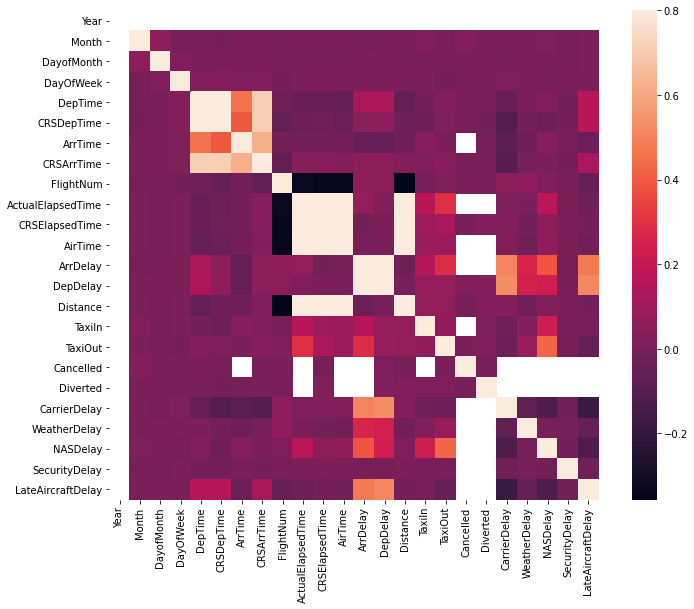

In [13]:
# Matriz de correlación  #

corrmat = file.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


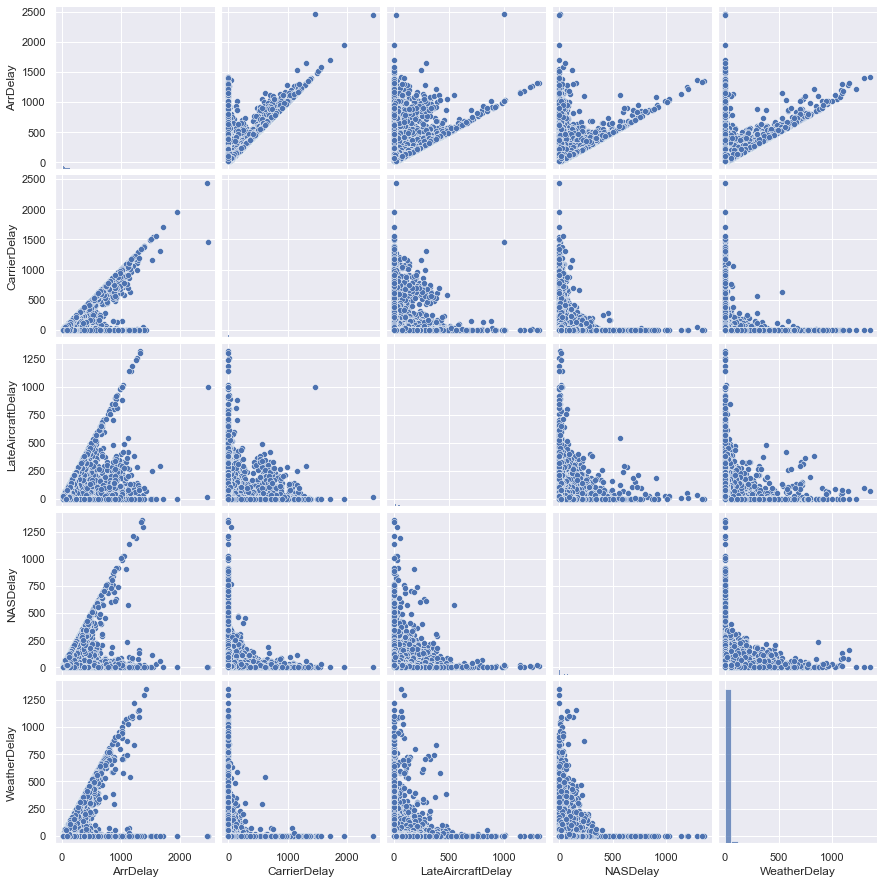

In [12]:
# Scatterplot #

# La matriz de correlación anterior indentifica las tres variables principales que generan los retrasos: Late Aircraft Delay, 
# Carrier Delay and NAS Delay. El scatterplot corrobora este supuesto, mostrando cómo esas tres variables crean la mayoría de 
# los retrasos durante el año.

# Antes de graficar, creamos la columna Status que representa si el vuela llegó en hora (0), con un poco retrasado (1), 
# con mucho retrasado (2), desviado (3) o cancelado (4)

for dataset in file:
    file.loc[file['ArrDelay'] <= 15, 'Status'] = 0
    file.loc[file['ArrDelay'] >= 15, 'Status'] = 1
    file.loc[file['ArrDelay'] >= 60, 'Status'] = 2
    file.loc[file['Diverted'] == 1, 'Status'] = 3
    file.loc[file['Cancelled'] == 1, 'Status'] = 4

sns.set()
Delayedflights = file[(file.Status >= 1) & (file.Status < 3)]
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [31]:
# Comprabamos las columnas que tienen valores NaN, ya que los modelos de regresión en python no aceptan estos valores.

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [32]:
# De momento, reemplazamos los valores faltantes en ArrDelay por la media aritmética de la respectiva variable para evitar 
# pérdida de datos, ya que sabemos que seguro vamos a utilizar dicha variable. 

file['ArrDelay']=file['ArrDelay'].fillna(file['ArrDelay'].mean())

In [33]:
# Comprobamos que la variable ArrDelay ya no tiene valores NaN.

total_nan_values = file['ArrDelay'].isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
0


### <span style="color:black">Exercici 1.</span>

__Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0):__ <span style="color:blue">__[X] Fet__</span>

In [21]:
# VAMOS A REALIZAR 3 MODELOS DE REGRESIÓN: ÁRBOL DE DECISIÓN, REGRESIÓN LOGÍSTICA Y KNN #

In [36]:
# Antes de comenzar, y como requiere el enunciado, vamos a convertir ArrDelay en un target cuyos valores serán 0 (si llegó en
# o con antelación a la hora prevista) y 1 (si el vuelo llegó con retraso). A este target le llamaremos 'labeldelay'.

condiciones = [(file.ArrDelay == 0) & (file.ArrDelay < 0), # si el vuelo llega en hora o con antelación
               (file.ArrDelay > 0)] # si el vuelo llega con retraso
elecciones = np.array(('0', '1'), dtype="int64") # 0: sin retraso ; 1: con retraso

file["labeldelay"] = np.select(condiciones, elecciones) # creamos la nueva columna 

In [37]:
# Vamos a comprobar si nuestra variable target está desbalanceada

file["labeldelay"].value_counts()

1    1731802
0     204956
Name: labeldelay, dtype: int64

<AxesSubplot:xlabel='labeldelay', ylabel='count'>

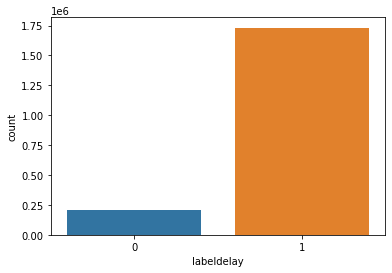

In [19]:
# Visualizamos la variable y vemos que así es. Esto tendrá repercusiones a la hora de comprobar el Accuracy de los modelos, por 
# lo que vamos ha intentar balancear los datos cuando ejecutemos los algoritmos. En Random Forest y en Regresión Logística 
# utilizaré un parámetro adicional "weight = 'balanced'" y con esto el algoritmo se encargará de equilibrar a la clase 
# minoritaria durante el entrenamiento. En cuando a KNN, voy a RandomOverSampler() para hacer un oversampling de la clase 
# minoritaria, es decir, de los vuelos que han llegado a tiempo&con antelación. 

sns.countplot (x = file["labeldelay"]) 

In [129]:
# ÁRBOL DE DECISIÓN #

In [20]:
X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [21]:
X.shape, y.shape

((1936758, 1), (1936758,))

In [22]:
X_train, X_test, y_train, y_test_clf = train_test_split(X, y, test_size=0.20)

In [23]:
clf = DecisionTreeClassifier(class_weight="balanced").fit(X_train, y_train) # Añadimos el parámetro class_weight" para penalizar
                                                                            # la clase mayoritaria.

In [24]:
y_pred_clf = clf.predict(X_test)
print('predicted response:', y_pred_clf, sep='\n')

predicted response:
[1 1 1 ... 0 0 0]


In [25]:
y_test_clf.shape, y_pred_clf.shape

((387352,), (387352,))

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf))

Accuracy: 0.7207733534356348


In [27]:
# REGRESIÓN LOGÍSTICA #

In [28]:
X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [29]:
X_train, X_test, y_train, y_test_logreg = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
logreg = LogisticRegression(class_weight="balanced").fit(X_train, y_train) # Añadimos el parámetro class_weight" para penalizar
                                                                            # la clase mayoritaria.

In [31]:
y_pred_logreg = logreg.predict(X_test)
print('predicted response:', y_pred_logreg, sep='\n')

predicted response:
[1 0 1 ... 1 1 1]


In [32]:
y_test_logreg.shape, y_pred_logreg.shape

((387352,), (387352,))

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test_logreg, y_pred_logreg))

Accuracy: 0.7212509552035358


In [ ]:
# KNN 

In [ ]:
# Como tengo falta de memoria y el dataset es muy largo, en este algoritmo he extraído una muestra aleatoria del 15% (a partir
# del 10% una muestra se considera representativa de la población) y he aplicado un train/test.

In [34]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['labeldelay'] #variable dependiente (retraso en la llegada)

In [35]:
df = df.sample(frac=0.15) # extraemos una muestra aleatoria del 15%, así nos aseguramos que es lo suficientemente representativa

In [36]:
X= np.array(df['X']).reshape((-1, 1)) # features (retraso en la salida)
y= df['y'] # target (nos dice si el avión llegó o no llegó con retraso)

In [37]:
X_train, X_test, y_train, y_test_knn = train_test_split(X, y, test_size=0.20)

In [38]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 207908, 0: 24503})
Distribution labels after resampling Counter({1: 207908, 0: 207908})


In [39]:
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train_res, y_train_res)

In [40]:
y_pred_knn= knn_clf.predict(X_test)
print('predicted response:', y_pred_knn, sep='\n')

predicted response:
[1 1 1 ... 0 0 1]


In [42]:
y_test_knn.shape, y_pred_knn.shape

((58103,), (58103,))

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))

Accuracy: 0.7166927697365024


### <span style="color:black">Exercici 2.</span>

__Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confussió i d’altres mètriques més avançades:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# CONFUSSION MATRIX #

In [44]:
# Lo fundamental de una matriz de confusión es el número de predicciones correctas e incorrectas, que se resumen por clases.
# Los valores diagonales representan predicciones precisas, mientras que los elementos no diagonales son predicciones inexactas.
# En el caso del Arbol de Decisión, de los 387.352 vuelos que forman parte de nuestra muestra, 36934 predijimos correctamente 
# quenllegaron a su hora y 242.286 predijimos correctamente que llegaron con retraso. Sin embargo, predijimos incorrectamente 
# que 103.950 llegaron con retraso y que 4.182 llegaron a tiempo.

cm_clf = metrics.confusion_matrix(y_test_clf, y_pred_clf)
print(cm_clf)

[[ 36562   4278]
 [103881 242631]]


Text(0.5, 257.44, 'Predicted label')

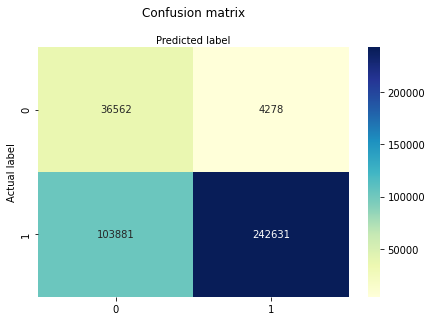

In [45]:
# Visualización de la matriz de confusión

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creamos el heatmap 

sns.heatmap(pd.DataFrame(cm_clf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
cm_logreg = metrics.confusion_matrix(y_test_logreg, y_pred_logreg)
print(cm_logreg)

[[ 36619   4232]
 [103742 242759]]


Text(0.5, 257.44, 'Predicted label')

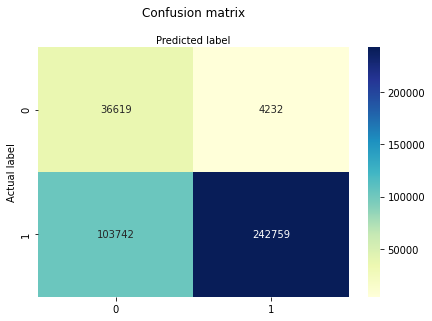

In [47]:
# Visualización de la matriz de confusión

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creamos el heatmap 

sns.heatmap(pd.DataFrame(cm_logreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
cm_knn = metrics.confusion_matrix(y_test_knn, y_pred_knn)
print(cm_knn)

[[ 4847  1239]
 [15222 36795]]


Text(0.5, 257.44, 'Predicted label')

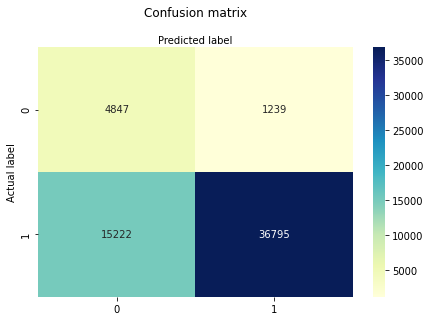

In [49]:
# Visualización de la matriz de confusión

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creamos el heatmap 

sns.heatmap(pd.DataFrame(cm_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [214]:
# COMPARACIÓN EN BASE A ACCURACY # 

In [215]:
# Ya lo calculé en el ejercicio anterior, pero igualmente incluyo el resultado en el presente ejercicio. 

In [50]:
print('Accuracy in DecitionTree:', metrics.accuracy_score(y_test_clf, y_pred_clf)) 
print('Accuracy in Logistic Regression:', metrics.accuracy_score(y_test_logreg, y_pred_logreg)) 
print('Accuracy in KNN:', metrics.accuracy_score(y_test_knn, y_pred_knn)) 

Accuracy in DecitionTree: 0.7207733534356348
Accuracy in Logistic Regression: 0.7212509552035358
Accuracy in KNN: 0.7166927697365024


In [ ]:
# Como mentaba en el ejercicio 1, la métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas como 
# es en este caso. La mayoría de los vuelos llegan tarde, así que es muy fácil predecir diciendo que los vuelos van a llegar con
# cierto retraso. Para problemas con clases desbalanceadas es mucho mejor usar precision, recall y F1. Estas métricas dan una 
# mejor idea de la calidad del modelo. Las vemos a continuación. 

In [ ]:
# PRECISIÓN DEL MODELO # 

In [158]:
# La precisión nos dice qué tan exacto es el modelo. En otras palabras, cuando un modelo hace una predicción nos dice con 
# qué frecuencia es correcta.

In [51]:
print("Precision in DecitionTree:",metrics.precision_score(y_test_clf, y_pred_clf))
print('Precision in Logistic Regression:', metrics.precision_score(y_test_logreg, y_pred_logreg)) 
print('Precision in Logistic Regression:', metrics.precision_score(y_test_knn, y_pred_knn)) 

Precision in DecitionTree: 0.982673778598593
Precision in Logistic Regression: 0.9828657724370523
Precision in Logistic Regression: 0.9674238838933585


In [ ]:
# EXHAUSTIVIDAD DEL MODELO # 

In [159]:
# La métrica de exhaustividad nos informa sobre la cantidad que el modelo de machine learning es capaz de identificar. Por 
# ejemplo, si tenemos un recall de 0.77 en KNN, eso significa que si hay vuelos con retraso, el modelo puede identificarlo 
# el 77% de las veces.

In [52]:
print("Recall in DecitionTree::",metrics.recall_score(y_test_clf, y_pred_clf))
print("Recall in Logistic Regression:",metrics.recall_score(y_test_logreg, y_pred_logreg))
print("Recall in KNN:",metrics.recall_score(y_test_knn, y_pred_knn))

Recall in DecitionTree:: 0.7002095165535392
Recall in Logistic Regression: 0.700601152666226
Recall in KNN: 0.7073648999365592


In [ ]:
# F1 SCORE DEL MODELO #

In [ ]:
# El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. ¡CUIDADO! El valor F1 asume que nos 
# importa de igual forma la precisión y la exhaustividad (recall). Esto no tiene que ser así en todos los problemas.

In [53]:
print("F1 in DecitionTree::",metrics.f1_score(y_test_clf, y_pred_clf))
print("F1 in Logistic Regression:",metrics.f1_score(y_test_logreg, y_pred_logreg))
print("F1 in KNN:",metrics.f1_score(y_test_knn, y_pred_knn))

F1 in DecitionTree:: 0.8177364805087787
F1 in Logistic Regression: 0.8180699992586252
F1 in KNN: 0.8172035846353732


In [ ]:
# NOTA. Una forma de ver resumidos las 3 métricas anteriores es con 'classification_report'. Vemos a continuación un ejemplo
# con el algoritmo KNN.

In [54]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.24      0.80      0.37      6086
           1       0.97      0.71      0.82     52017

    accuracy                           0.72     58103
   macro avg       0.60      0.75      0.59     58103
weighted avg       0.89      0.72      0.77     58103



### <span style="color:black">Exercici 3.</span>

__Entrena’ls utilitzant els diferents paràmetres que admeten:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# ÁRBOL DE DECISIÓN #

In [55]:
#Cargamos las variables de nuevo y aplicamos train/test

X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [56]:
X_train, X_test, y_train, y_test_clf = train_test_split(X, y, test_size=0.20)

In [57]:
# Entrenamos el modelo utilizando los parámetros por defecto, y vemos que el Accuracy ha mejorado, aunque nos da un resultado
# engañoso: ya hemos comentado en este mismo notebook que no esta métrica no funciona bien cuando las clases están 
# desbalanceadas.

clf = DecisionTreeClassifier().fit(X_train, y_train) 
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf)) 
print("Precision in DecitionTree:",metrics.precision_score(y_test_clf, y_pred_clf))

Accuracy: 0.8942512236931783
Precision in DecitionTree: 0.8942512236931783


In [58]:
# Entrenamos el modelo variando los parámetros

clf = DecisionTreeClassifier(class_weight="balanced", criterion="entropy", max_depth=1).fit(X_train, y_train) 
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf)) 
print("Precision in DecitionTree:",metrics.precision_score(y_test_clf, y_pred_clf))

Accuracy: 0.6548823808835375
Precision in DecitionTree: 0.9912878787878788


In [59]:
# Entrenamos el modelo variando los parámetros

clf = DecisionTreeClassifier(class_weight="balanced").fit(X_train, y_train) 
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf)) 
print("Precision in DecitionTree:",metrics.precision_score(y_test_clf, y_pred_clf))

Accuracy: 0.7213852000247837
Precision in DecitionTree: 0.9827600168431964


In [60]:
# Entrenamos el modelo variando los parámetros

clf = DecisionTreeClassifier(class_weight="balanced", criterion='gini', max_depth=3, min_samples_split=5).fit(X_train, y_train) 
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf)) 
print("Precision in DecitionTree:",metrics.precision_score(y_test_clf, y_pred_clf))

Accuracy: 0.7581682810466965
Precision in DecitionTree: 0.9755986480077686


In [319]:
# REGRESIÓN LOGÍSTICA #

In [61]:
#Cargamos las variables de nuevo y aplicamos train/test

X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [62]:
X_train, X_test, y_train, y_test_logreg = train_test_split(X, y, test_size=0.20)

In [63]:
# Entrenamos el modelo utilizando los parámetros por defecto, y como ocurría en DecisionTree, vemos que el Accuracy ha mejorado, 
# pero el resultado es engañoso ya que nuestra variable target tiene clases muy desbalanceadas.

logreg = LogisticRegression().fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_logreg, y_pred_logreg))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_logreg, y_pred_logreg))

Accuracy: 0.8934457547656911
Precision in Logistic Regression: 0.8934457547656911


In [64]:
# Entrenamos el modelo variando los parámetros

logreg = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_logreg, y_pred_logreg))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_logreg, y_pred_logreg))

Accuracy: 0.7210934757016874
Precision in Logistic Regression: 0.9822999525891587


In [65]:
# Entrenamos el modelo variando los parámetros

logreg = LogisticRegression(class_weight="balanced", penalty='l2', n_jobs=1, solver='lbfgs').fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_logreg, y_pred_logreg))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_logreg, y_pred_logreg))

Accuracy: 0.7210934757016874
Precision in Logistic Regression: 0.9822999525891587


In [67]:
# Entrenamos el modelo variando los parámetros (¡CUIDADO!: TARDA MUCHO TIEMPO EN EJECUTAR)

logreg = LogisticRegression(class_weight="balanced", random_state = 0, dual=True,  solver='liblinear', max_iter=2000).fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_logreg, y_pred_logreg))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_logreg, y_pred_logreg))

Accuracy: 0.7210934757016874
Precision in Logistic Regression: 0.9822999525891587


c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# KNN #

In [68]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['labeldelay'] #variable dependiente (retraso en la llegada)

df = df.sample(frac=0.15) # extraemos una muestra aleatoria del 15%

X= np.array(df['X']).reshape((-1, 1)) # features (retraso en la salida)
y= df['y'] # target (nos dice si el avión llegó o no llegó con retraso)

In [69]:
X_train, X_test, y_train, y_test_knn = train_test_split(X, y, test_size=0.20)

In [70]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 207850, 0: 24561})
Distribution labels after resampling Counter({1: 207850, 0: 207850})


In [71]:
# Entrenamos el modelo con los parámetros por defecto. 

knn_clf = KNeighborsClassifier().fit(X_train_res, y_train_res) 
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_knn, y_pred_knn))

Accuracy: 0.6969347537992875
Precision in Logistic Regression: 0.9387312995387007


In [72]:
# Entrenamos de nuevo KNN variando los parámetros

knn_clf = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree', leaf_size=10).fit(X_train_res, y_train_res)
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_knn, y_pred_knn))

Accuracy: 0.7367605803486911
Precision in Logistic Regression: 0.9403417943002325


In [73]:
# ¿Cómo saber qué valor debe ser el de n_neightbors? En la celda anterior hemos utilizado K=15 y a continuación utilizamos
# n_neighbors=5 ya que suele ser el valor más comúnmente utilizado para el algoritmo KNN. En las dos celdas siguientes vamos 
# a calcular la media de error para todos los valores predichos donde K varía entre 1 y 20, los que nos ayudará a encontrar 
# los mejores valores para K. 

knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train_res, y_train_res) 
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_knn, y_pred_knn))

Accuracy: 0.6969347537992875
Precision in Logistic Regression: 0.9387312995387007


([<matplotlib.axis.XTick at 0x26c004a5c08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

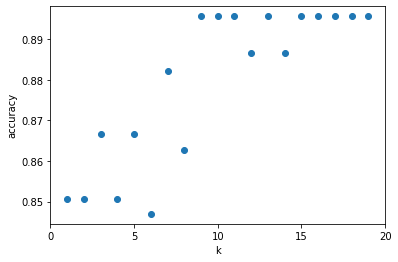

In [74]:
# A continuación calculamos la precisión obtenida para los valores de K entre 1 y  20, y graficamos. En la gráfica resultante 
# vemos que ente K=11 y K=15 es donde mayor precisión se logra.

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test_knn))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [75]:
# Volvemos a ejecutar KNN con K=11, según el resultado del gráfico anterior, y observamos que tanto el accuracy como la 
# precisión del algoritmo mejoran considerablemente.

knn_clf = KNeighborsClassifier(n_neighbors=11).fit(X_train_res, y_train_res) 
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred_knn))
print("Precision in Logistic Regression:",metrics.precision_score(y_test_knn, y_pred_knn))

Accuracy: 0.737294115622257
Precision in Logistic Regression: 0.9422928894448186


### <span style="color:black">Exercici 4.</span>

__Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (cross-validation):__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Vamos a comparar el rendimiento de los modelos utilizando cross-validation, ya que en los ejercicios anteriores ya hemos 
# utilizado train/test.

In [ ]:
# ÁRBOL DE DECISIÓN #

In [126]:
X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [127]:
X.shape, y.shape

((1936758, 1), (1936758,))

In [128]:
clf = DecisionTreeClassifier(class_weight="balanced", criterion='gini', max_depth=3, min_samples_split=5).fit(X, y)

In [129]:
cv = KFold(n_splits=3)

In [130]:
for i, score in enumerate(cross_val_score(clf, X, y, cv=cv)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.7621556229534098
Accuracy for the fold no. 1 on the test set: 0.6835138928043669
Accuracy for the fold no. 2 on the test set: 0.7567667204679159


In [131]:
y_pred = clf.predict(X)

In [132]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.84      0.42    204956
           1       0.98      0.75      0.85   1731802

    accuracy                           0.76   1936758
   macro avg       0.63      0.80      0.64   1936758
weighted avg       0.90      0.76      0.80   1936758



In [ ]:
# LOGISTIC REGRESSION #

In [119]:
X= np.array(file['DepDelay']).reshape((-1, 1)) # features (retraso en la salida)
y= file['labeldelay'] # target (nos dice si el avión llegó o no llegó con retraso)

In [120]:
X.shape, y.shape

((1936758, 1), (1936758,))

In [121]:
logreg = LogisticRegression(class_weight="balanced").fit(X,y)

In [122]:
cv = KFold(n_splits=3)

In [123]:
for i, score in enumerate(cross_val_score(logreg, X, y, cv=cv)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.7246981811873244
Accuracy for the fold no. 1 on the test set: 0.7175589309557519
Accuracy for the fold no. 2 on the test set: 0.7211788979314917


In [124]:
y_pred = logreg.predict(X)

In [125]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.90      0.40    204956
           1       0.98      0.70      0.82   1731802

    accuracy                           0.72   1936758
   macro avg       0.62      0.80      0.61   1936758
weighted avg       0.91      0.72      0.77   1936758



In [ ]:
# KNN #

In [149]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['labeldelay'] #variable dependiente (retraso en la llegada)

df = df.sample(frac=0.15) # extraemos una muestra aleatoria del 15%

X= np.array(df['X']).reshape((-1, 1)) # features (retraso en la salida)
y= df['y'] # target (nos dice si el avión llegó o no llegó con retraso)

In [150]:
X.shape, y.shape

((290514, 1), (290514,))

In [151]:
os =  RandomOverSampler()
X_res, y_res = os.fit_resample(X, y)

print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution labels after resampling {}".format(Counter(y_res)))

Distribution before resampling Counter({1: 259642, 0: 30872})
Distribution labels after resampling Counter({1: 259642, 0: 259642})


In [152]:
knn_clf = KNeighborsClassifier(n_neighbors=11).fit(X_res, y_res) 

In [153]:
cv = KFold(n_splits=5)

In [154]:
for i, score in enumerate(cross_val_score(knn_clf, X_res, y_res, cv=cv)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.6790587057203655
Accuracy for the fold no. 1 on the test set: 0.6895346486033681
Accuracy for the fold no. 2 on the test set: 0.7048537893449647
Accuracy for the fold no. 3 on the test set: 0.7693270554705027
Accuracy for the fold no. 4 on the test set: 0.6565725620089354


In [155]:
y_pred = knn_clf.predict(X_res)

In [156]:
print(classification_report(y_res, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75    259642
           1       0.74      0.80      0.77    259642

    accuracy                           0.76    519284
   macro avg       0.77      0.76      0.76    519284
weighted avg       0.77      0.76      0.76    519284



### <span style="color:black">Exercici 5.</span>

__Realitza algun procés d’enginyeria de variables per millorar-ne la predicció:__<span style="color:blue">__[X] Fet__</span>

In [ ]:
# En los ejercicios anteriores hemos visto que el modelo creado con KNN quizá no era el que mejor predecía, respecto a los 
# modelos creados con DecisionTree o LogisticRegression, si un vuelo iba a llegar con retraso. Sin embargo sí es con diferencia 
# el que predice con mayor precisión si un avión va a llegar on time ( el 79% de las veces lo predecirá de forma correcta), 
# frente al 26% y 28% de los otros dos algoritmos. Por ello, a continuación vamos a ver si haciendo feature engineering 
# (vamos a escalar los datos) y feature selection podemos mejorar el modelo. 

In [ ]:
# En primer lugar, voy a hacer feature selection con SelectKBest. Hasta ahora no había utilizado ninguna función de feature
# selection ya que en este dataset es muy obvio cuales son las features que más información nos pueden proporcionar para conocer
# si un vuelo va a llegar tarde o no. Pero igualmente vamos a probar. 

In [218]:
df = pd.DataFrame()
X = file[['DepDelay', 'Month','DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime']] # a través de la Matriz de correlación, seleccionamos 6 variables
y = file['labeldelay'] #variable dependiente (retraso en la llegada)

In [219]:
features = SelectKBest(chi2, k = 3)
X_kbest_features = features.fit_transform(X, y)
  
# Reducimos las variables a 3: 

print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 6
Reduced feature number: 3


In [220]:
# Visualizamos los datos de las variables seleccionadas y lo contrastamos con el dataset 'X' para saber qué variables son.

print(X_kbest_features[:5])

[[   8. 2003. 1955.]
 [  19.  754.  735.]
 [   8.  628.  620.]
 [  34. 1829. 1755.]
 [  25. 1940. 1915.]]


In [221]:
print(X.head())

   DepDelay  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime
0       8.0      1           3          4   2003.0        1955
1      19.0      1           3          4    754.0         735
2       8.0      1           3          4    628.0         620
3      34.0      1           3          4   1829.0        1755
4      25.0      1           3          4   1940.0        1915


In [222]:
# Vemos que las tres mejores variables de DelayedFlights son DepDelay, DepTime y CRSDepTime.

In [223]:
 # extraemos una muestra aleatoria del 15% por problemas de memoria en mi PC

df=file[['DepDelay', 'DepTime', 'CRSDepTime', 'labeldelay']]
df = df.sample(frac=0.15)

In [224]:
df.head()

,DepDelay,DepTime,CRSDepTime,labeldelay
1318552,119.0,1754.0,1555,1
893702,25.0,1515.0,1450,1
1569960,50.0,1439.0,1349,1
373334,9.0,2014.0,2005,1
1846105,65.0,1437.0,1332,1


In [225]:
# A continuación vamos a realizar un escalado de las características.

scaler = StandardScaler().fit(df)

In [226]:
X =df[['DepDelay', 'DepTime', 'CRSDepTime']]
y = df['labeldelay']

In [227]:
#X= np.array(X).reshape((-1, 1)) # features (hora de salida y retraso en la salida (en minutos))
#y= y # target (nos dice si el avión llegó o no llegó con retraso)

In [228]:
X.shape, y.shape

((290514, 3), (290514,))

In [229]:
# Balanceamos de nuevo los datos 

os =  RandomOverSampler()
X_res, y_res = os.fit_resample(X, y)

print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution labels after resampling {}".format(Counter(y_res)))

Distribution before resampling Counter({1: 259717, 0: 30797})
Distribution labels after resampling Counter({1: 259717, 0: 259717})


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [152]:
knn_clf = KNeighborsClassifier(n_neighbors=11).fit(X_res, y_res) 

In [155]:
y_pred = knn_clf.predict(X_res)

In [233]:
# Voilà, hemos mejorado la precisión en la predicción de los vuelos retrasados de 0.72 al 0.89%!

print(classification_report(y_res, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83    259717
           1       0.89      0.73      0.80    259717

    accuracy                           0.82    519434
   macro avg       0.83      0.82      0.82    519434
weighted avg       0.83      0.82      0.82    519434



### <span style="color:black">Exercici 6.</span>

__No utilitzis la variable DepDelay a l’hora de fer prediccions:__ <span style="color:blue">__[X] Fet__</span>

In [256]:
# Como no podemos utilizar la variable DepDelay, vamos a realizar un sumatorio de las variables donde se describe el motivo 
# de los retrasos (LateAircraftDelay, CarrierDelay, NASDelay, SecurityDelay y WeatherDelay), y utilizar las features 'DepTime' 
# y 'CRSDepTime' que tan buen resultado nos ha dado en el ejercicio 5, e intentar mejorar el modelo con KNN. Veamos si funciona. 

In [87]:
# Sustituimos los valors NaN de las featrures que vamos a utilizar

file['CarrierDelay']=file['CarrierDelay'].fillna(file['CarrierDelay'].mean())
file['WeatherDelay']=file['WeatherDelay'].fillna(file['WeatherDelay'].mean())
file['SecurityDelay']=file['SecurityDelay'].fillna(file['SecurityDelay'].mean())
file['NASDelay']=file['NASDelay'].fillna(file['NASDelay'].mean())
file['LateAircraftDelay']=file['LateAircraftDelay'].fillna(file['LateAircraftDelay'].mean())

In [97]:
suma = file["LateAircraftDelay"] + file["CarrierDelay"] + file["NASDelay"] + file["SecurityDelay"] + file["WeatherDelay"]

data = pd.DataFrame()
data["Delay"] = suma
data['DepTime']=file['DepTime']
data['CRSDepTime']=file['CRSDepTime']
X = np.array(data) # features
y= file['labeldelay'] # target

In [98]:
data.shape, file['labeldelay'].shape

((1936758, 3), (1936758,))

In [99]:
# extraemos una muestra aleatoria del 15% por problemas de memoria en mi PC

df = pd.DataFrame(X, y)
df = df.sample(frac=0.15)
df.head()

,0,1,2
labeldelay,,,
1,97.000000,2140.0,1953.0
1,31.000000,2202.0,2135.0
1,63.291208,1607.0,1550.0
1,63.291208,1529.0,1520.0
1,76.000000,1118.0,1005.0


In [101]:
X = df.loc[:,[0,1,2]] # features
y= df.index # target

In [103]:
# Balanceamos de nuevo los datos. 

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({1: 259808, 0: 259808})


In [105]:
X.shape, y.shape

((519616, 3), (519616,))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [107]:
knn_clf = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train) 

In [109]:
y_pred = knn_clf.predict(X)

In [111]:
# Desde la Tasca del sprint 12 al presente ejercicio hemos conseguido mejorar muchísimo el modelo, consiguiento una precisión en
# la predicción de un 97% para los vuelos con retraso, y un 81% para los vuelos que llegan a tiempo o con antelación. 

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89    259808
           1       0.97      0.78      0.86    259808

    accuracy                           0.87    519616
   macro avg       0.89      0.87      0.87    519616
weighted avg       0.89      0.87      0.87    519616

